In [1]:
# 대표값 card_category 활용 결측치 Unkown 대체


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


data = pd.read_csv("./BankChurners.csv")


In [2]:
# CLINETNUM DROP

data.drop('CLIENTNUM',axis =1,inplace =True)

data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
# 범주형 변수들  INT형태로 변환


from sklearn import preprocessing

def encode_features(dataDf):
    data['Gender'] = data['Gender'].str[:1]
    data['Education_Level'] = data['Education_Level'].str[:3]
    data['Marital_Status'] = data['Marital_Status'].str[:1]
    data['Card_Category'] = data['Card_Category'].str[:1]
    data['Income_Category'] = data['Income_Category'].str[:2]
    features = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Card_Category','Income_Category']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDf[feature])
        dataDf[feature] = le.transform(dataDf[feature])
        
    return dataDf


data = encode_features(data)


In [4]:
# X,y 분할

X = data.drop('Attrition_Flag', axis = 1)
Y = data['Attrition_Flag']


In [5]:
# 학습 데이터와 평가 데이터로 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y,random_state=4)

In [11]:
# Famhist : 범주형 변수 (최빈값)

# 그외 변수 : 연속형 변수 (평균값)

# 대표값을 평균으로 할지, 최빈값으로 사용 할 지 결정할 수 없음  --> 데이터를 분할해서 사용

Train_X_cate = Train_X[['Gender','Marital_Status','Education_Level','Income_Category','Card_Category']]
Train_X_cont = Train_X.drop(['Gender','Marital_Status','Education_Level','Income_Category','Card_Category'],axis=1)

Test_X_cate = Test_X[['Gender','Marital_Status','Education_Level','Income_Category','Card_Category']]
Test_X_cont = Test_X.drop(['Gender','Marital_Status','Education_Level','Income_Category','Card_Category'],axis=1)

In [12]:
# 대표값 이용 결측치 대체

from sklearn.impute import SimpleImputer


# 각 데이터에 사용할 인스턴스 생성

SI_mode =SimpleImputer(strategy = 'most_frequent') # 대표값 최빈값

SI_mean = SimpleImputer(strategy = 'mean') # 대표값 평균

In [13]:
# 학습

SI_mode.fit(Train_X_cate)
SI_mean.fit(Train_X_cont)

SimpleImputer(strategy='most_frequent')

SimpleImputer()

In [14]:
# sklearn instance의 출력은 ndarray이므로 다시 DataFrame으로 바꿔줌
Train_X_cate = pd.DataFrame(SI_mode.transform(Train_X_cate),
                            columns = Train_X_cate.columns)

Test_X_cate = pd.DataFrame(SI_mode.transform(Test_X_cate),
                           columns = Test_X_cate.columns)

Train_X_cont = pd.DataFrame(SI_mean.transform(Train_X_cont),
                            columns = Train_X_cont.columns)

Test_X_cont = pd.DataFrame(SI_mean.transform(Test_X_cont),
                           columns = Test_X_cont.columns)

In [15]:
# 분할된 df 결합

Train_X = pd.concat([Train_X_cate,Train_X_cont],axis = 1)
Test_X = pd.concat([Test_X_cate, Test_X_cont], axis = 1)

In [16]:
Train_X

,Gender,Marital_Status,Education_Level,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,1,3,2,0,47.0,2.0,39.0,1.0,2.0,2.0,9389.0,727.0,8662.0,0.533,3415.0,84.0,0.556,0.077
1,0,1,0,4,0,45.0,3.0,35.0,3.0,2.0,2.0,1717.0,1156.0,561.0,0.647,4301.0,64.0,0.641,0.673
2,0,1,6,4,3,31.0,1.0,36.0,2.0,3.0,1.0,10353.0,1520.0,8833.0,0.724,15028.0,124.0,0.746,0.147
3,1,1,3,1,0,65.0,1.0,53.0,3.0,3.0,3.0,3506.0,1604.0,1902.0,0.574,1953.0,61.0,0.649,0.458
4,1,1,2,1,0,29.0,0.0,36.0,3.0,3.0,4.0,1459.0,590.0,869.0,1.164,2229.0,52.0,1.080,0.404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7590,1,1,5,3,0,47.0,3.0,36.0,6.0,2.0,2.0,29770.0,1565.0,28205.0,0.674,1774.0,42.0,2.000,0.053
7591,0,2,3,4,0,44.0,3.0,31.0,3.0,2.0,2.0,1980.0,823.0,1157.0,0.861,4467.0,69.0,0.683,0.416
7592,1,3,2,1,0,40.0,5.0,25.0,6.0,2.0,3.0,7860.0,541.0,7319.0,0.764,1367.0,35.0,0.750,0.069
7593,0,0,2,1,0,49.0,4.0,30.0,1.0,3.0,3.0,2485.0,1648.0,837.0,0.595,4208.0,71.0,0.919,0.663


In [19]:
## 학습데이터와 테스트 데이터 레이블 분포 확인
print('학습 데이터 레이블 값 비율')
print(Train_Y.value_counts()/Train_Y.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(Train_Y.value_counts()/Train_Y.shape[0] * 100)

학습 데이터 레이블 값 비율
1    83.765635
0    16.234365
Name: Attrition_Flag, dtype: float64
테스트 데이터 레이블 값 비율
1    83.765635
0    16.234365
Name: Attrition_Flag, dtype: float64


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(Test_Y, pred=None, pred_proba=None):
    confusion = confusion_matrix(Test_Y, pred)
    accuracy = accuracy_score(Test_Y , pred)
    precision = precision_score(Test_Y, pred)
    recall = recall_score(Test_Y, pred)
    f1 = f1_score(Test_Y,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(Test_Y, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [21]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(Train_X, Train_Y)

lr_pred = lr_clf.predict(Test_X)
lr_pred_proba  = lr_clf.predict_proba(Test_X)[:,1]

get_clf_eval(Test_Y,lr_pred,lr_pred_proba)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

오차 행렬
[[ 207  187]
 [  97 2041]]
정확도: 0.8878, 정밀도: 0.9161, 재현율: 0.9546,    F1: 0.9350, AUC:0.9025


In [22]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None) :
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test,pred,pred_proba) ## 평가진행 함수 호출

In [24]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=Train_X, ftr_test=Test_X, tgt_train=Train_Y, tgt_test=Test_Y)

오차 행렬
[[ 346   48]
 [  26 2112]]
정확도: 0.9708, 정밀도: 0.9778, 재현율: 0.9878,    F1: 0.9828, AUC:0.9921


In [35]:
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=156)
dt_clf.fit(Train_X,Train_Y)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [36]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", impurity=True, filled=True)


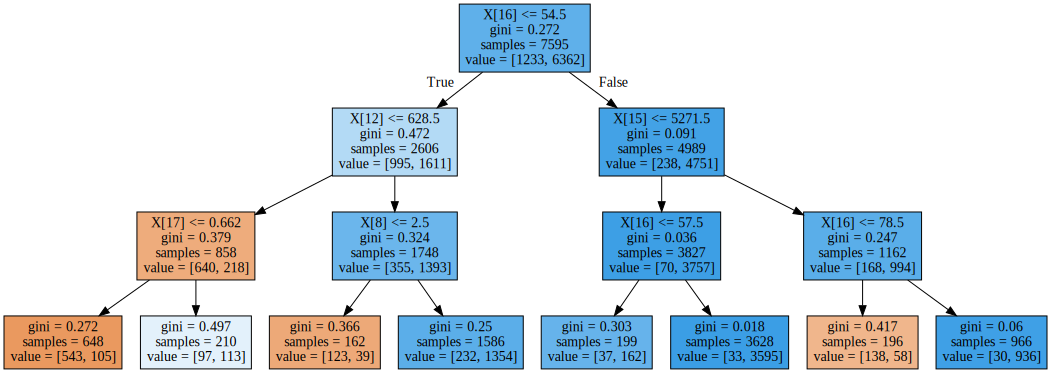

In [38]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)